In [2]:
%pwd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_dir = "../../Data/Weather/"
%matplotlib inline
!mkdir -p $data_dir
!ls $data_dir

STAT.pickle                 ghcnd-stations.txt
SampleStations.pickle       ghcnd-stations_buffered.txt
data-source.txt             ghcnd-version.txt
ghcnd-readme.txt            stations.pkl


### Downloading Pickled data from S3
If `SampleStations.pickle` is not in the directory, get it using the following command

In [3]:
!curl -o $data_dir/SampleStations.pickle http://mas-dse-open.s3.amazonaws.com/Weather/SampleStations.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  398M  100  398M    0     0  1133k      0  0:06:00  0:06:00 --:--:-- 1016k


### Plot Reconstructions

From each measurement, we take 2 sample stations with low residual error and 2 sample stations with high residual error and plot the following:

* Original Data Vector
* Mean Vector
* Reconstructed Data Vector using mean and top 1 eigen vectors
* Reconstructed Data Vector using mean and top 2 eigen vectors
* Reconstructed Data Vector using mean and top 3 eigen vectors

### Read and Preprocess data

Read data from the pickle files `SampleStations.pickle` and `STAT.pickle`

* `SampleStations.pickle` contains information about the 6 measurements taken from some sample stations. You have been provided the code to process this file. It converts the seemingly complicated structure into a list of lists where each sublist has the following information:

`['station','measurement','year','1', '2', '3', ...... , '365']`

*  station - The station ID
*  measurement - One of the 6 types of measurements
*  year - The year in which the measurements were recorded
*  1-365 - The actual value of measurement for each day of the year



* `STAT.pickle` contains statistics about the weather data for each of the 6 measurements and its description.

In [4]:
import pickle
Data=pickle.load(open(data_dir+'SampleStations.pickle','r'))
STAT,STAT_description=pickle.load(open(data_dir+'STAT.pickle','r'))

In [6]:
FlatData=[] #This is the pre-processed data with format: ['station','measurement','year','1', '2', '3', ...... , '365']
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)
        
print shape(FlatData)

(38436, 368)


In [7]:
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={} #Process flatdata to DataFrame and then separated by measurement.
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]    #t stands for temp
    m_df[m]=t_df    #m stands for measurement

In [18]:
print type(m_df['TMAX'])

<class 'pandas.core.frame.DataFrame'>


### Define Reconstruction Function

You need to plot reconstructions for two stations with low reconstruction error and two stations with high reconstruction error. To do this, you will need to do the following:

1. Calculate the reconstruction error for the data vector reconstructed using mean and top-3 eigenvectors.
2. Remove the ones for which reconstruction error is NaN.
3. Choose two with the lowest and two with the highest reconstruction error for plotting.

In [58]:
m = 'SNWD'
npa_mean = STAT[m]['Mean']
npa_EigVecs = STAT[m]['eigvec'].T[0:3]
npa_Data = array(m_df[m])[:,3:368]

print nansum(dstack((npa_Data[1],npa_Data[3])),axis=2)
print shape(npa_mean), shape(npa_EigVecs), shape(npa_Data), type(npa_Data)

[[nan nan nan nan nan nan nan nan 102.0 nan nan 64.0 nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan 0.0 0.0 nan 0.0 nan 0.0 nan 0.0 0.0 0.0 0.0 nan nan nan nan
  nan nan nan nan 0.0 nan nan 0.0 0.0 nan nan 0.0 nan nan 0.0 0.0 nan 0.0
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan n

In [34]:
def create_reconstructions(m):  
    
    ## Put your code for computating reconstructions here
    npa_mean = STAT[m]['Mean']
    npa_EigVecs = STAT[m]['eigvec'].T[0:3]
    
    
    yeardays=[i for i in (1,366)]
    plt.figure(figsize=(20,30),dpi=300)
    j=1
    c=0
    for l in lower:   #lower should be 2 stations with low reconstruction error
        subplot(4,2,j)
        j+=1
        c+=1
        plot(original[l])
        plot(STAT[m]['Mean'])
        plot(Reconstructed[1][:,l])
        plot(Reconstructed[2][:,l])
        plot(Reconstructed[3][:,l])
        title('#' + str(c) + ' Sample for ' + m + ' (low residual error)')
        xlim([0,365])
        legend(['original','Mean','1','2','3'],loc=2)
    
    c=0
    for l in upper:
        subplot(4,2,j)
        j+=1
        c+=1
        plot(original[l])
        plot(STAT[m]['Mean'])
        plot(Reconstructed[1][:,l])
        plot(Reconstructed[2][:,l])
        plot(Reconstructed[3][:,l])
        title('#' + str(c) + ' Sample for ' + m + ' (high residual error)')
        xlim([0,365])
        legend(['original','Mean','1','2','3'],loc=2)
        

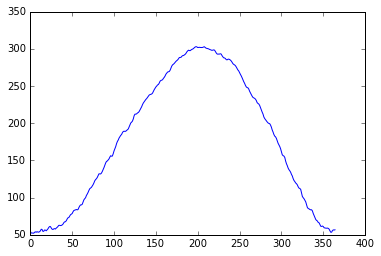

In [17]:

plot(STAT['TMAX']['Mean'])

In [11]:
for m in ['TMAX','SNWD']:
    print 'Reconstruction Plots for '+ m
    create_reconstructions(m)

Reconstruction Plots for TMAX


NameError: global name 'lower' is not defined